# **Load data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/shakespeare_dataset_AUTOCOMPLETE

/content/drive/MyDrive/shakespeare_dataset_AUTOCOMPLETE


In [ ]:
data = open('text.txt', 'r', encoding='utf-8').read()

# **Prepare data**

In [ ]:
chars = sorted(list(set(data)))
print(len(chars))
print(chars)

71
['\n', ' ', '!', '$', '&', "'", '(', ')', ',', '-', '.', '1', '2', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
data[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [ ]:
sentences= [c for c in data]
len(sentences)

1508560

In [ ]:
sentences[:15]

['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n']

In [ ]:
seq_len = 51
step = 6
voc_size = len(sentences)
lines = []
for i in range(seq_len, voc_size, step):
  line = sentences[i-seq_len: i]
  lines.append(line)

len(lines)

251419

# **Model**

In [ ]:
import numpy as np
import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional

In [ ]:
word_index = {}
for i, c in enumerate(chars):
  word_index[c] = i

print(word_index)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '1': 11, '2': 12, '3': 13, ':': 14, ';': 15, '?': 16, 'A': 17, 'B': 18, 'C': 19, 'D': 20, 'E': 21, 'F': 22, 'G': 23, 'H': 24, 'I': 25, 'J': 26, 'K': 27, 'L': 28, 'M': 29, 'N': 30, 'O': 31, 'P': 32, 'Q': 33, 'R': 34, 'S': 35, 'T': 36, 'U': 37, 'V': 38, 'W': 39, 'X': 40, 'Y': 41, 'Z': 42, '[': 43, ']': 44, 'a': 45, 'b': 46, 'c': 47, 'd': 48, 'e': 49, 'f': 50, 'g': 51, 'h': 52, 'i': 53, 'j': 54, 'k': 55, 'l': 56, 'm': 57, 'n': 58, 'o': 59, 'p': 60, 'q': 61, 'r': 62, 's': 63, 't': 64, 'u': 65, 'v': 66, 'w': 67, 'x': 68, 'y': 69, 'z': 70}


In [ ]:
def tokenization(text):
  lines = []
  for line in text:
    tokenized_line = []
    for char in line:
      tokenized_line.append(word_index[char])
    lines.append(tokenized_line)

  return lines

In [ ]:
tokenized_lines = tokenization(lines)
tokenized_lines = np.array(tokenized_lines)
X, Y = tokenized_lines[:, :-1], tokenized_lines[:, -1]

In [ ]:
print(tokenized_lines.shape)
print(X.shape)
print(Y.shape)

(251419, 51)
(251419, 50)
(251419,)


In [ ]:
vocab_size = len(word_index)
Y = to_categorical(Y, num_classes=vocab_size)

In [ ]:
model = Sequential()
model.add(Embedding(80, vocab_size, input_length=seq_len-1))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.25))
model.add((LSTM(128, return_sequences=True)))
model.add((LSTM(64, return_sequences=True)))
model.add((LSTM(32, return_sequences=True)))
model.add((LSTM(16)))
model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 71)            5680      
                                                                 
 bidirectional (Bidirectiona  (None, 50, 512)          671744    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 256)          656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 128)          164352    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
history = model.fit(X, Y, batch_size=256, epochs=100)

Epoch 1/100
983/983 [==============================] - 85s 68ms/step - loss: 3.3222 - accuracy: 0.1509
Epoch 2/100
983/983 [==============================] - 71s 72ms/step - loss: 3.1439 - accuracy: 0.1618
Epoch 3/100
983/983 [==============================] - 71s 72ms/step - loss: 2.8863 - accuracy: 0.2180
Epoch 4/100
983/983 [==============================] - 71s 72ms/step - loss: 2.6333 - accuracy: 0.2735
Epoch 5/100
983/983 [==============================] - 71s 72ms/step - loss: 2.5603 - accuracy: 0.2899
Epoch 6/100
983/983 [==============================] - 71s 72ms/step - loss: 2.4995 - accuracy: 0.3044
Epoch 7/100
983/983 [==============================] - 71s 72ms/step - loss: 2.4343 - accuracy: 0.3235
Epoch 8/100
983/983 [==============================] - 71s 72ms/step - loss: 2.3681 - accuracy: 0.3438
Epoch 9/100
983/983 [==============================] - 71s 72ms/step - loss: 2.3109 - accuracy: 0.3540
Epoch 10/100
983/983 [==============================] - 71s 72ms/step - l

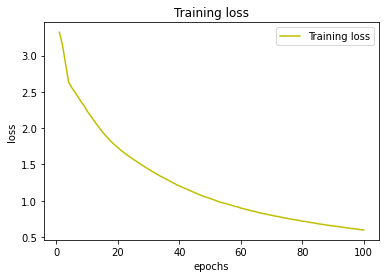

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Testing**

In [ ]:
def sample(preds):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds)
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probs = np.random.multinomial(1, preds, 1)

  return np.argmax(probs)

In [ ]:
index_2_word = {v:k for k, v in word_index.items()}

In [ ]:
import random
import sys

seq_length = 50

start_index = random.randint(0, len(data) - seq_length - 1)

generated = ''
sentence = data[start_index : start_index + seq_length]
generated += sentence

print('------ seed for our text generation:  \n', sentence + '"')

for i in range(1500):
  x_pred = np.zeros((1, seq_length))
  for i, char in enumerate(sentence):
    x_pred[0, i] = word_index[char]

  preds = model.predict(x_pred, verbose=0)[0]
  next_index = sample(preds)
  next_char = index_2_word[next_index]

  generated += next_char
  sentence = sentence[1:] + next_char

  sys.stdout.write(next_char)
  sys.stdout.flush()

print()

------ seed for our text generation:  
 ture that in time will Venom breed,
No teeth for t"
hat consume us the rest-line,
Gjore thels to agairs. Let the rest of him.
But neiding. Madam, marry thus sent bring
This could and good dreab! Dome thinke he will less
arm of Herceber Bohing.


Solne k Moises, Gold and Mightand Esiend: What king,
To all ever the holy for a part flower of recriEf;
And when unusunes such a kingly heart
My glave revenge in my 'ea, and leber
And her Chaels help in exage!

BALTHON:
Alare it; Rosincrage, it come to retish Blate,
To s'ery hey do it sit upon with a bown
Were may first him never to no right of death?

DUKE OF YORK:
Iud'st remife, a wing, and Camillo, I see:
Our attowing their oMfifutation shooth,
And housed in Yores, and she will sleter thee;
How thou hast a sty son'd, and till themselve't,
Bribes with betch Fafters rincess me with all
Is he hath being tvoue, not for i the rabes and lichs
bid Tigen ochating side his son he hath
By I have forgect twelcher

In [ ]:
model.save('autocorrect_weights.h5')

In [ ]:
file_name = 'autocorrect_weights.h5'
model.load_weights(file_name)